### SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

[see also](https://shap.readthedocs.io)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Directories
images_directory = "../images/aculei-images"
datasets_directory = "../feed-datasets"

In [3]:
df = pd.read_pickle(datasets_directory + '/aculei-numerical.pkl')
df.head()

,temperature,wild boar,porcupine,fox,badger,marten,wolf,deer,hare,squirrel,...,season_winter,day_time_day,day_time_night,hunter_camera_1.0,hunter_camera_2.0,hunter_camera_3.0,hunter_camera_4.0,hunter_camera_5.0,hunter_camera_6.0,hunter_camera_7.0
0,25.0,0.970243,0.011796,0.011460,0.001555,0.001512,0.000991,0.000947,0.000824,0.000282,...,0,0,1,1,0,0,0,0,0,0
1,16.0,0.996869,0.002792,0.000112,0.000078,0.000033,0.000027,0.000049,0.000013,0.000010,...,0,0,1,1,0,0,0,0,0,0
2,9.0,0.084593,0.352572,0.188861,0.205791,0.131927,0.003121,0.002608,0.004968,0.008771,...,0,1,0,0,0,0,0,0,1,0
3,15.0,0.181697,0.263160,0.280894,0.010420,0.045404,0.011294,0.020466,0.067673,0.004126,...,0,1,0,0,0,0,0,0,1,0
4,19.0,0.000118,0.000149,0.942590,0.000321,0.048537,0.007341,0.000033,0.000437,0.000366,...,0,0,1,1,0,0,0,0,0,0


In [4]:
print(df.temperature.max(), df.temperature.min())

36.0 -6.0


We use a scaler to scale the features because the temperature for example is in a range between -6 and +36 while the other features are between 0 and 1. This have been done also in the previous notebooks

In [5]:
import sklearn.preprocessing as preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

Fill temperature NaN using the mean value

In [6]:
mean_value = df.temperature.mean()
df.temperature.fillna(value=mean_value, inplace=True)

Perform the clusterization using KMeans algorrithm

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = 19
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(df)

# predictions
cluster_labels = model.predict(df)

# adding the results to the df cluster
df['cluster'] = cluster_labels

print(f'Silhoutte score: {silhouette_score(df, cluster_labels)}')

Silhoutte score: 0.7006145493312742


### Supervised clustering ?

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
import shap
from sklearn.datasets import make_classification

# simulate raw data
X, y = make_classification(
    n_samples=1000,
    n_features=50,
    n_informative=5,
    n_classes=2,
    n_clusters_per_class=3,
    shuffle=False
)

# fit a GBT model to the data
m = GradientBoostingClassifier()
m.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(m)
shap_values = explainer(X)

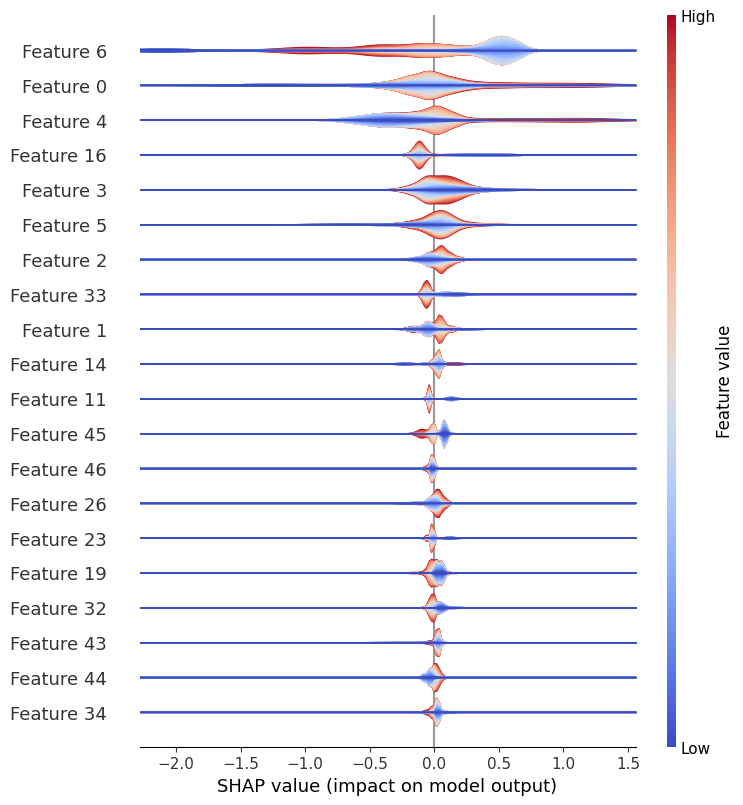

In [14]:
shap.plots.violin(shap_values)